# Introduction

# Describe the problem and the source of data

# Import needed libraries and setting global variables

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set_theme()
random_state = 42

# Data Cleaning

In [5]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Describe the data statistically and visualize the data

In [32]:
df["Pregnancies"].unique()

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

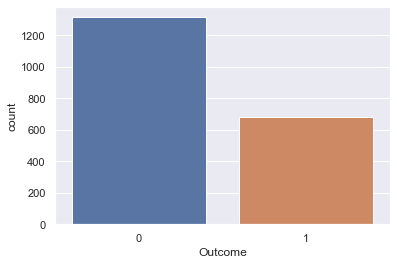

In [28]:
sns.countplot(x=df['Outcome'])

<Figure size 1152x720 with 0 Axes>

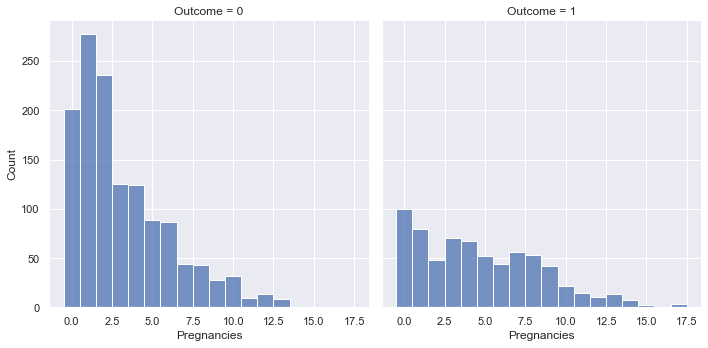

In [40]:
plt.figure(figsize=(16,10))
hist_pre = sns.displot(data=df, x="Pregnancies", col="Outcome", discrete=True, bins=df["Pregnancies"].unique().shape[0])

# hist_pre.set_xticklabels(range(0,df["Pregnancies"].max()+1))

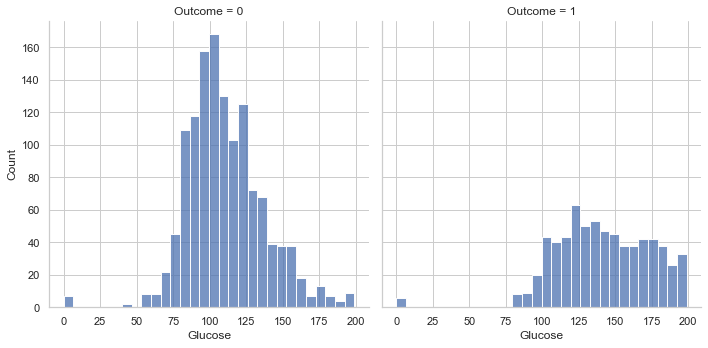

In [17]:
sns.displot(data=df, x="Glucose", col="Outcome")

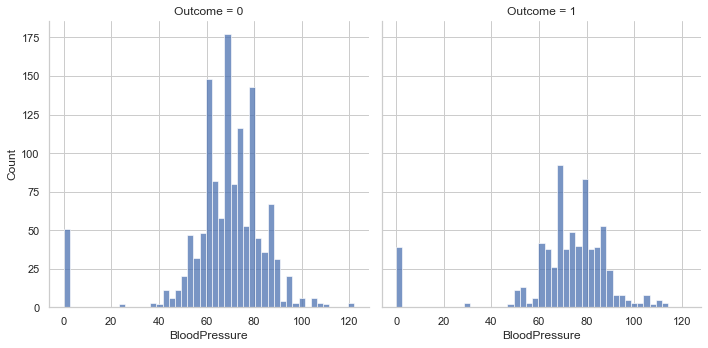

In [18]:
sns.displot(data=df, x="BloodPressure", col="Outcome")

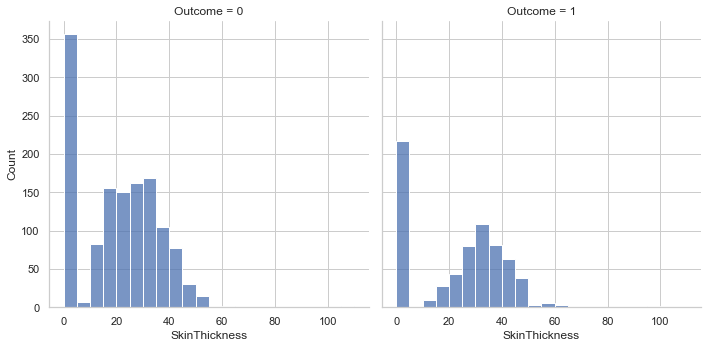

In [19]:
sns.displot(data=df, x="SkinThickness", col="Outcome")

In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


<AxesSubplot:>

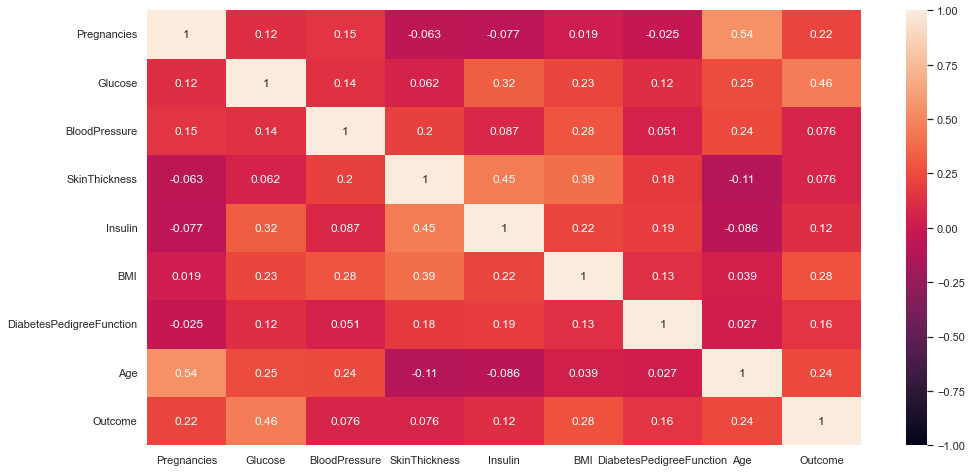

In [23]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [29]:
df[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']].replace(0,np.NaN).isnull().sum()

Glucose           13
BloodPressure     90
SkinThickness    573
BMI               28
Insulin          956
dtype: int64

In [30]:
df.loc[['Glucose','BloodPressure','SkinThickness','BMI','Insulin'], ].replace(0,np.NaN, inplace=True)

/var/folders/p9/bvjc95fs59x9fhwbfrxwpzp00000gn/T/ipykernel_15314/3662250076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']].replace(0,np.NaN, inplace=True)


## Preprocessing the data

# Models

## K-Nearest Neighbors

## Support Vector Machines

## Decision Tree

## Random Forest

## Voting Models -> ensemble learning

# Conclusion

## Compare the models